<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 30px; font-size: 27px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming For Data Science @ FIT-HCMUS, VNU-HCM
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Exploratory data analysis
</div>

## Import

In [1]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read cleaned data

In [2]:
supermarket_df = pd.read_csv("../data/processed/supermarket_sales_processed.csv", 
                             index_col="Invoice ID", parse_dates=["Datetime"])
supermarket_df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Datetime
Invoice ID,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00


## Question 1: How do the customer types, genders, and payment methods used by customers making product purchases differ across various store locations?
### Answering this question will:
- Enable businesses to identify who spends the average money the most in the store and which methods they use for payment.
- Allow businesses to discern differences in spending between Normal and Member customers in the store, potentially improving services or other ways to encourage increased spending.
### How we answer this question:
- Filter DataFrame for each location.
- For each DataFrame, group by Customer type, Gender, Payment and calculate number of transaction and mean rating.
- Visualize and comment on the chart.

### Get all store locations

In [3]:
locations = list(supermarket_df["City"].unique())
locations

['Yangon', 'Naypyitaw', 'Mandalay']

### Create `plot_chart` function to visualize

In [4]:
def plot_chart(data : pd.DataFrame, location : str):
    """
    Visualize a plot about 'Mean Total Payment' per 'Gender' and 'Payment Type' for each type in location store.
    
    Args:
        df (pd.DataFrame): Input dataframe for visualize.
        location (str): Input location name
    """
    # Set a mask to filter data for a specific city
    mask = data["City"] == location
    df = data[mask]
    # Create a new DataFrame grouped by 'Customer type', 'Gender', and 'Payment' showing mean 'Total' values
    new_df = df.groupby(['Customer type', 'Gender', 'Payment']).agg({'Total': ['mean']})
    new_df.columns = ['Mean Total Payment']
    # Unstack the multi-level index to make it easier for plotting
    new_df_unstacked = new_df.unstack().reset_index()
    
    # Create figure and axes for plotting
    fig, ax = plt.subplots(figsize=(18, 10), nrows=2)
    
    # Separate the data by gender into 2 DataFrames: male and female
    male = new_df_unstacked[new_df_unstacked['Gender'] == 'Male']
    female = new_df_unstacked[new_df_unstacked['Gender'] == 'Female']
    
    # Set indices, width and space for bar plot
    indices = np.arange(3) + 0.5
    width = 0.22
    space = 0.01
    
    for index, type in enumerate(['Member', 'Normal']):
        # Filter the DataFrames by customer type (Member/Normal)
        male_filtered = male[male['Customer type'] == type]
        female_filtered = female[female['Customer type'] == type]
        
        # Create bar plots for mean total payment, distinguishing by gender
        bars = [
            (ax[index].bar(indices - width/2 - space, male_filtered['Mean Total Payment'].values.reshape(3, 1).flatten(),
                           width, color='skyblue', label='Males', edgecolor='black'), male_filtered),
            (ax[index].bar(indices + width/2 + space, female_filtered['Mean Total Payment'].values.reshape(3, 1).flatten(),
                           width, color='lightpink', label='Females', edgecolor='black'), female_filtered)
        ]
        
        # Loop through bars and add mean values as text labels
        for bars_type, data in bars:
            for bar, mean in zip(bars_type, data['Mean Total Payment'].values.reshape(3, 1).flatten()):
                ax[index].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mean:.2f}',
                               ha='center', va='bottom', color='black', fontsize=10)
        
        # Set title for each subplot
        ax[index].set_title(f'Mean Total Payment per Gender and Payment Type for {type} in {location}', fontsize=15)

        # Set xticks
        xticks = male_filtered['Mean Total Payment'].columns
        ax[index].set_xticks(indices)
        ax[index].set_xticklabels(xticks)
        
        # Set plot limits and legend
        ax[index].set_xlim(0, 3)
        ax[index].legend(loc='upper left')
    
    # Display the plot
    plt.show()

### Yangon

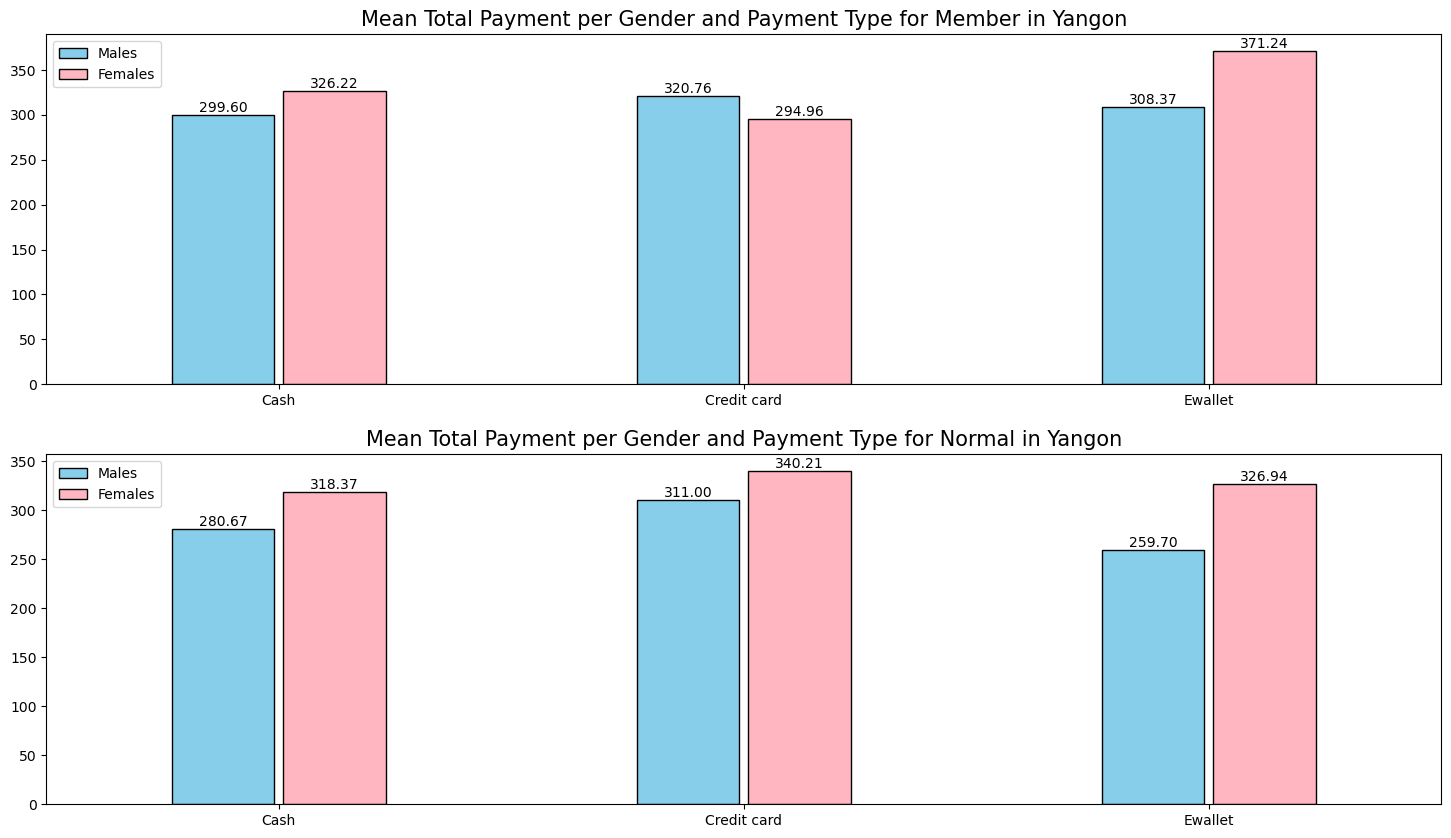

In [5]:
plot_chart(supermarket_df, 'Yangon')

#### Comment:
- On average, `Males` spend less money than `Females`.
- `Member Females` use `Ewallet` to spend the most money on average in this store.
- `Normal Males` use `Ewallet` to spend the least money on average in this store.
- For customers identified as `Member`, `Males` use payment methods equally. However, `Females` spend less money when using the `Credit card` payment method. 
- For customers identified as `Normal`, `Males` spend less money when using the `Credit card` payment method. But `Females` use `Credit card` as the method which they spend the most money. 

### Naypyitaw

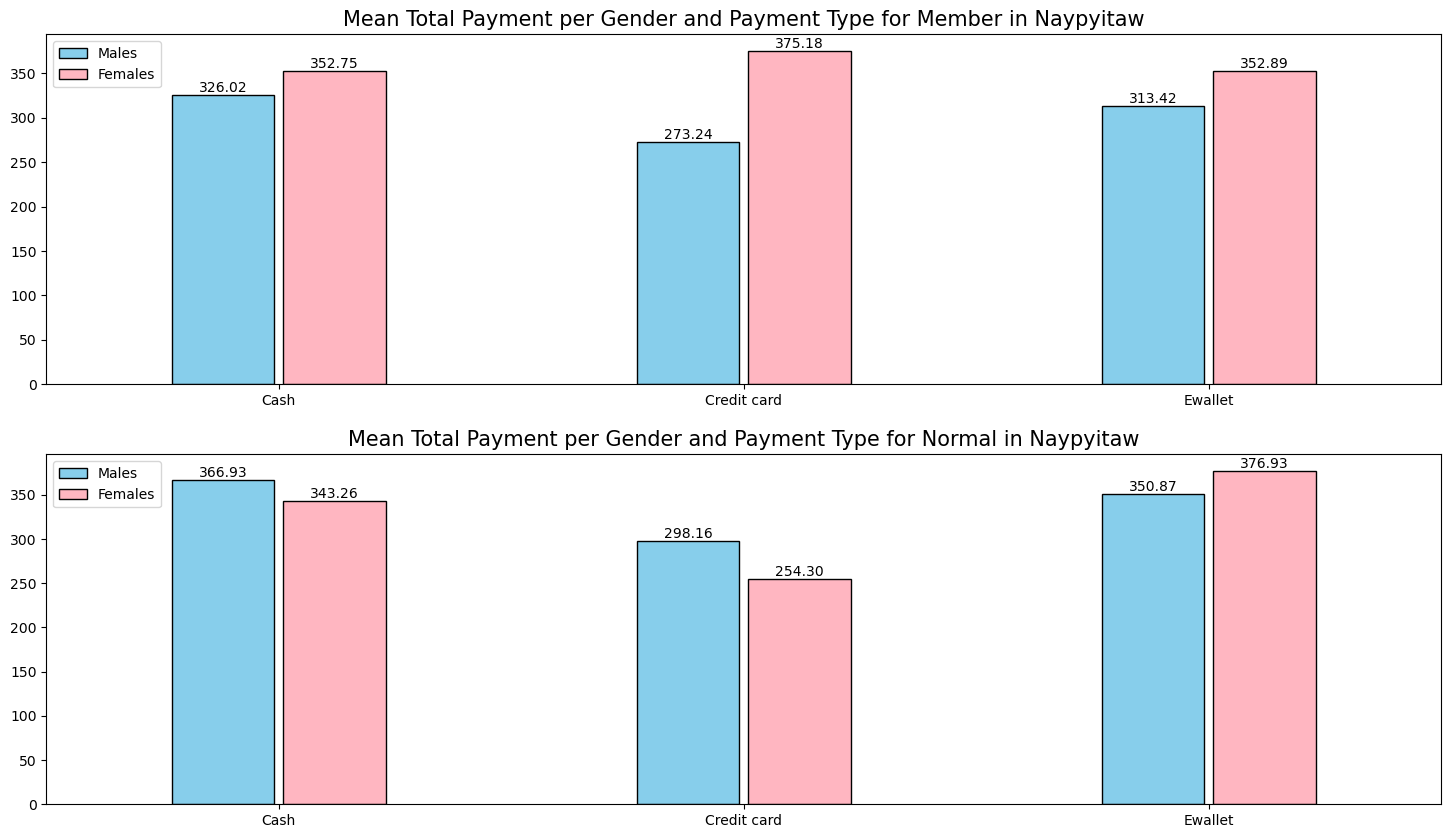

In [6]:
plot_chart(supermarket_df, 'Naypyitaw')

#### Comment:
- On average, `Males` spend less money than `Females` when identified as `Member` but more when identified as `Normal`.
- `Normal Females` use `Ewallet` to spend the most money on average in this store.
- `Normal Females` use `Credit card` to spend the least money on average in this store.
- `Member Females` use `Credit card` for larger purchases in this store, whereas `Normal Females` only use this method for smaller purchases.
- `Normal Male` almost use `Cash` for larger purchases.

### Mandalay

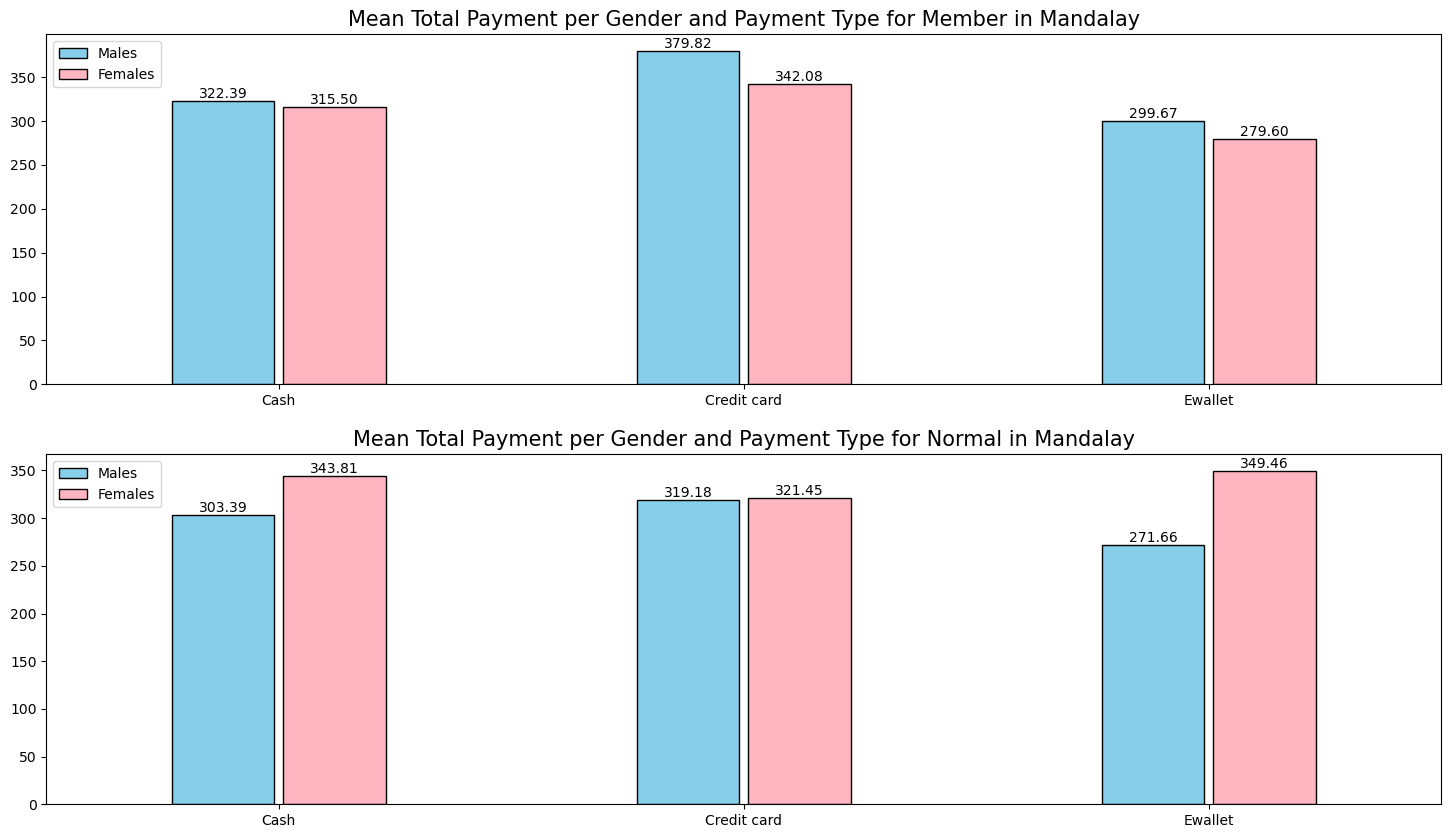

In [7]:
plot_chart(supermarket_df, 'Mandalay')

#### Comment:
- On average, `Females` spend less money than `Males` when identified as `Member` but more when identified as `Normal`.
- `Member Males` use `Credit card` to spend the most money on average in this store.
- `Normal Males` use `Ewallet` to spend the least money on average in this store.
- `Member Males` use `Credit card` for larger purchases in this store, whereas use `Ewallet` for smaller purchases.
- `Females` use less money in this store than 2 upper store.

## Question 2: What is the average rating for each day across various store locations within the month?
### Answering this question will:
- Businesses can identify the dates when they receive the highest average ratings. 
- This allows them to potentially improve services in the future to gain loyalty to the store.
### How we answer this question:
- Filter DataFrame for each location.
- For each DataFrame, filter by a specific month and year, create a gross income matrix.
- Visualize and comment on the chart.

### Get all store locations¶

In [8]:
locations = list(supermarket_df['City'].unique())
locations

['Yangon', 'Naypyitaw', 'Mandalay']

### Create `create_matrix_calendar` function to create matrix calendar for specific month and year

In [9]:
Month_Name = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

def create_matrix_calendar(month: int, year: int):
    """
    Create a matrix representing a calendar for a specific month and year.

    Args:
    - month (int): The month for which the calendar matrix is to be generated (1-12 for January to December).
    - year (int): The year for which the calendar matrix is to be generated.

    Returns:
    - numpy.ndarray: A 5x7 matrix representing the calendar for the specified month and year.
      The matrix contains day numbers with correct alignment to weekdays.
      The matrix may contain zeros for empty cells before the start and after the end of the month.
    """
    # Get the number of days in the specified month and year
    num_days = calendar.monthrange(year, month)[1]  # [1] returns the number of days

    # Get the weekday (0 - Monday, 6 - Sunday) of the first day of the specified month and year
    first_weekday = calendar.weekday(year, month, 1)

    # Create a matrix with dimensions 5x7 (5 weeks, 7 days)
    matrix_calendar = np.full((5, 7), -1.0)

    # Fill the matrix with day numbers for the specified month and year
    day_count = 1
    for week in range(5):
        for day in range(7):
            if week == 0 and day < first_weekday:
                continue  # Skip empty cells before the start of the month
            elif day_count > num_days:
                break  # Stop filling cells once all days are populated
            else:
                matrix_calendar[week][day] = day_count
                day_count += 1

    return matrix_calendar

### Create `plot_chart` function to visualize.

In [10]:
unique_year = supermarket_df['Datetime'].dt.year.unique()
unique_year

array([2019])

Since this DataFrame contains data only from 2019, the function requires only the month as an argument.

In [11]:
def plot_chart(df: pd.DataFrame, location : str,  month : int):
    """
    Create a chart based on data for a specific month, year, and location.

    Args:
    - df (pd.DataFrame): Input DataFrame containing the data.
    - location (str): The specific location for which data is filtered.
    - month (int): The month for which data is filtered (1-12 for January to December).
    """
    location_df = df[df['City'] == location]
    month_df = location_df[location_df['Datetime'].dt.month == month]
    matrix_calendar = create_matrix_calendar(month, 2019)
    
    # Mapping rating to respective days in matrix_calendar
    for week in range(5):
        for day in range(7):
            day_number = matrix_calendar[week][day]
            if day_number in month_df['Datetime'].dt.day.values:
                day_df = month_df[month_df['Datetime'].dt.day == day_number]
                rating_for_day = day_df['Rating'].values.mean()
                matrix_calendar[week][day] = rating_for_day
            else:
                matrix_calendar[week][day] = np.nan
                
    # Create a masked array
    masked_array = np.ma.masked_where((create_matrix_calendar(month, 2019) < 0), matrix_calendar)
    
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(masked_array, cmap='coolwarm', interpolation='nearest')
    # Adding numeric annotations to the heatmap
    for i in range(5):
        for j in range(7):
            if not masked_array.mask[i][j]:
                plt.text(j, i, f'{masked_array[i][j]:.2f}', ha='center', va='center', color='black')
    
    # Draw gridlines
    for i in range(-1, 5):
        plt.axhline(i + 0.5, color='black', linewidth=1.5)  # Horizontal lines
    for j in range(-1, 7):
        plt.axvline(j + 0.5, color='black', linewidth=1.5)  # Vertical lines
        
    # Adding color bar
    plt.colorbar(label='Rating')
    # Adding labels
    plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.yticks(np.arange(5), ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'])
    # Retrieve the month name from the dictionary
    text_month = Month_Name.get(month, 'Invalid Month')
    # # Displaying the plot
    plt.title(f"Mean Rating in {location}, {text_month} 2019", fontsize=15)
    plt.xlabel('Day of Week')
    plt.show()

### Yangon

In [12]:
yangon_df = supermarket_df[supermarket_df['City'] == 'Yangon']
unique_month = np.sort(yangon_df['Datetime'].dt.month.unique())
unique_month

array([1, 2, 3])

#### January

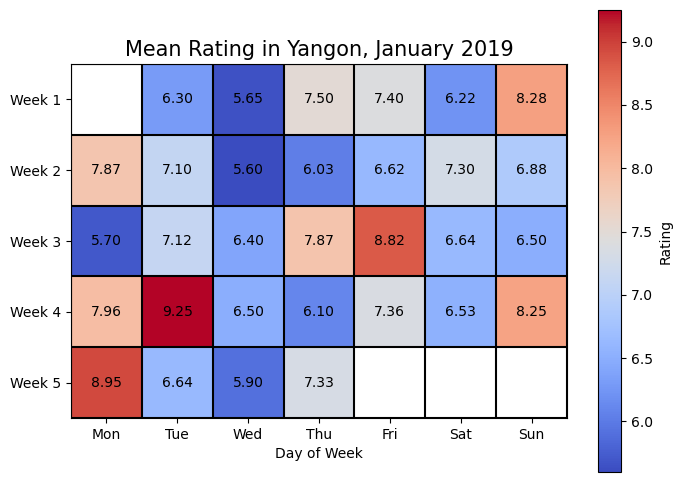

In [13]:
plot_chart(supermarket_df, 'Yangon', 1)

#### Comment:
- Tuesday of Week 4 is the highest rating in this store.
- Almost every weekday has a higher rating than the weekend within the same week.
- The rating every Wednesday ranges from about 5.5 to 6.5, which is lower than the ratings on other days

#### February

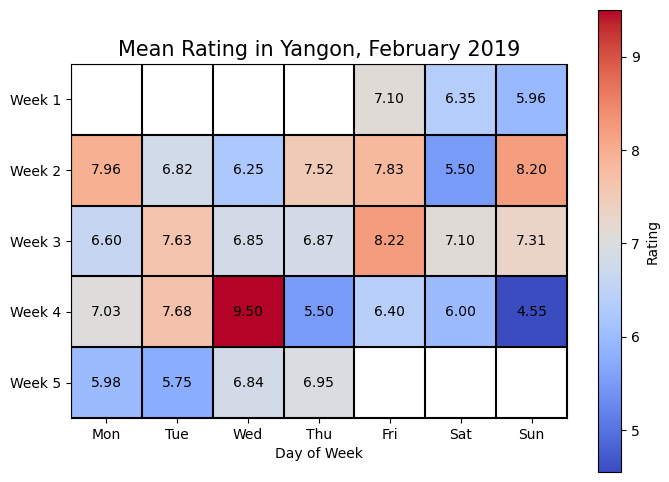

In [14]:
plot_chart(supermarket_df, 'Yangon', 2)

#### Comment:
- Wednesday of Week 4 has the highest rating in this store, reaching 9.5, which is an extremely high score.
- Sunday of Week 4 has a rating of 4.55, which is extremely low compared to the baseline level of the other days.

#### March

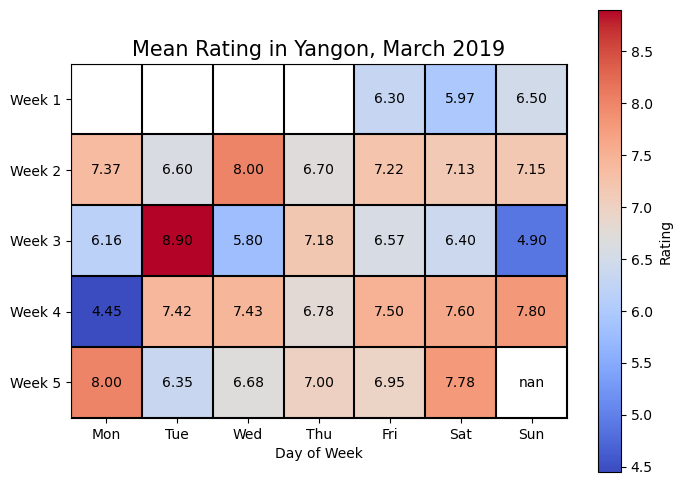

In [15]:
plot_chart(supermarket_df, 'Yangon', 3)

### Comment:
- Tuesday of Week 3 has the highest rating in this store.
- There were no sales or ratings recorded on Sunday of Week 5.
- The average ratings from Friday of Week 3 to Monday of Week 4 are notably lower compared to the rest of the month, especially on Sunday and Monday.

### Naypyitaw

In [16]:
naypyitaw_df = supermarket_df[supermarket_df['City'] == 'Naypyitaw']
unique_month = np.sort(naypyitaw_df['Datetime'].dt.month.unique())
unique_month

array([1, 2, 3])

#### January

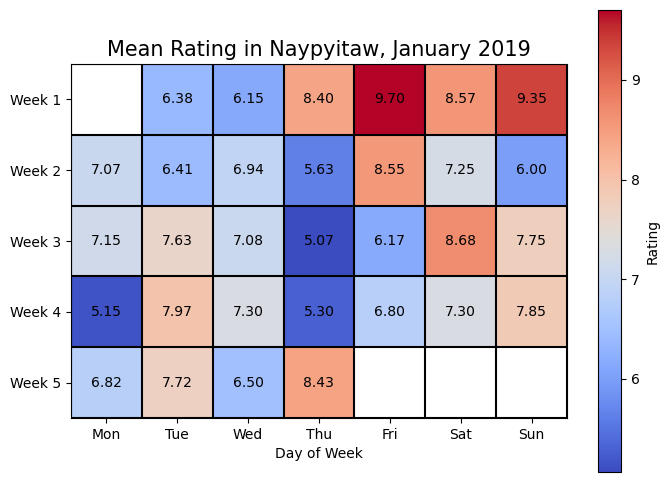

In [17]:
plot_chart(supermarket_df, 'Naypyitaw', 1)

#### Comment:
- Friday of Week 1 is the highest rating in this store.
- There is a streak of days with ratings over 8.0, starting from Thursday of Week 1 and extending through Sunday of Week 1.

#### February

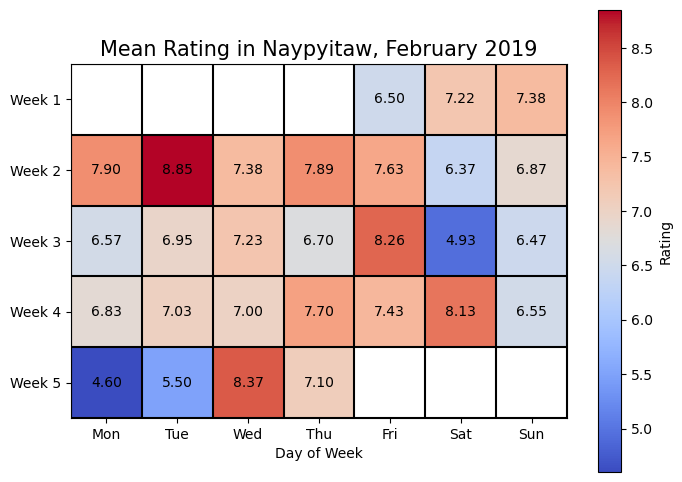

In [18]:
plot_chart(supermarket_df, 'Naypyitaw', 2)

#### Comment:
- Tuesday of Week 2 is the highest rating in this store.
- Almost every date in this month has an average rating of about 6.5 or higher, except for Saturday of Week 3 and Monday and Tuesday of Week 5.
- There are no dates with a rating over 9.0 in this month.

#### March

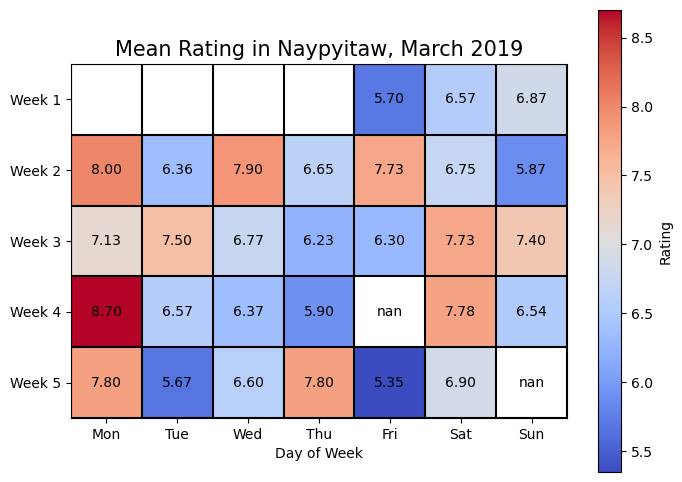

In [19]:
plot_chart(supermarket_df, 'Naypyitaw', 3)

#### Comment:
- Monday of Week 4 is the highest rating in this store.
- There were no sales or ratings recorded on Friday of Week 4 and Sunday Week 5.
- Almost every date in this month has an average rating ranging from about 6.5 to 8.
- There are no dates with a rating over 9.0 in this month.

### Mandalay

In [20]:
mandalay_df = supermarket_df[supermarket_df['City'] == 'Mandalay']
unique_month = np.sort(mandalay_df['Datetime'].dt.month.unique())
unique_month

array([1, 2, 3])

#### January

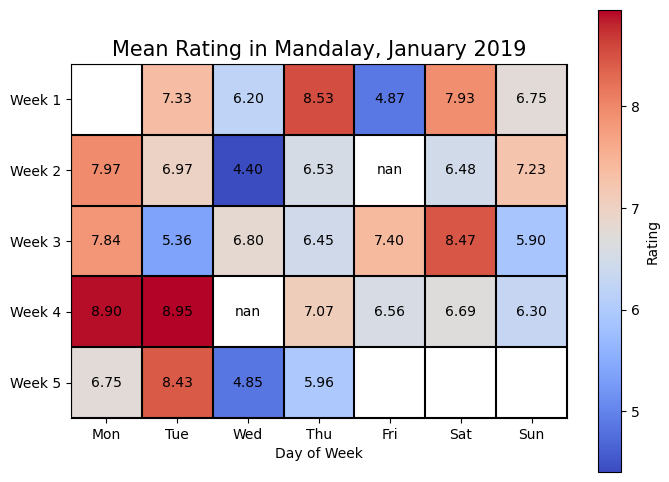

In [21]:
plot_chart(supermarket_df, 'Mandalay', 1)

#### Comment:
- Tuesday of Week 4 is the highest rating in this store.
- There were no sales or ratings recorded on Friday of Week 2 and Wednesday of Week 4.
- There are numerous dates with an average rating ranging from about 8.0 to 9.0. However, there are also many dates with an average rating below 5.0

#### February

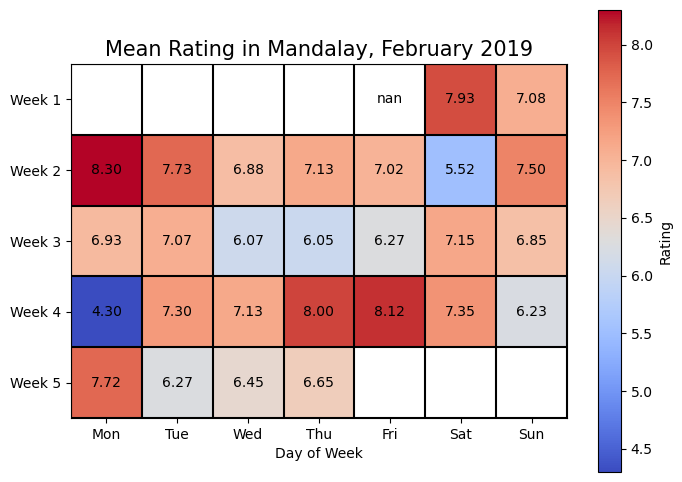

In [22]:
plot_chart(supermarket_df, 'Mandalay', 2)

#### Comment:
- Tuesday of Week 2 is the highest rating in this store.
- There were no sales or ratings recorded on the first date of this month.
- Almost every date in this month has an average rating of about 6.0 or 8.0.
- There are no dates with a rating over 9.0 in this month.

#### March

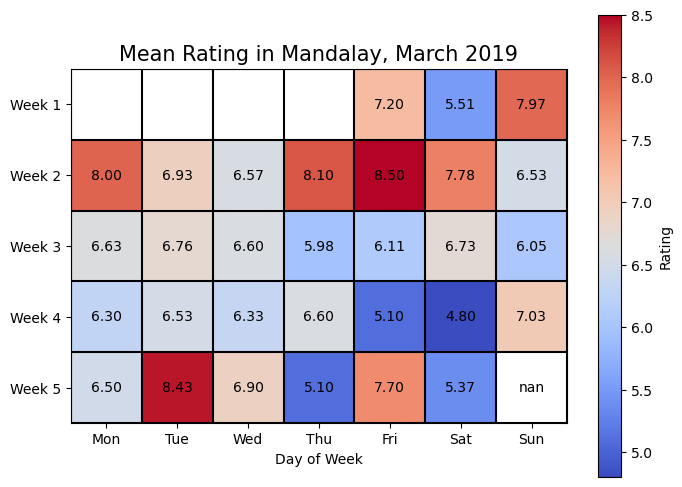

In [23]:
plot_chart(supermarket_df, 'Mandalay', 3)

#### Comment:
- Monday of Week 4 is the highest rating in this store.
- There were no sales or ratings recorded on last date of this month.
- There are numerous dates with an average rating below 6.5.
- There are no dates with a rating over 9.0 in this month.